## Student Performance Indicator

### Problem Statement

This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

### Data Collection

- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

#### Dataset Information
- gender : gender of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

#### Data Checks to Perform
- Check Missing values
- Check Duplicates
- Check Null and data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [4]:
#check for missing values
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [5]:
#check for duplicates
df.duplicated().sum()

0

In [6]:
#check null and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
#check for unique values
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [8]:
#check statistics of dataset
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Insight**
- All means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading it is highest 17.

#### Exploring Data

In [9]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
print("Categories in 'gender' variable are: ", df['gender'].unique())
print("Categories in 'race_ethnicity' variable are: ", df['race_ethnicity'].unique())
print("Categories in 'parental_level_of_education' variable are: ", df['parental_level_of_education'].unique())
print("Categories in 'lunch' variable are: ", df['lunch'].unique())
print("Categories in 'test_preparation_course' variable are: ", df['test_preparation_course'].unique())

Categories in 'gender' variable are:  ['female' 'male']
Categories in 'race_ethnicity' variable are:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable are:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable are:  ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable are:  ['none' 'completed']


In [11]:
#defining numerical and categorical columns
numerical_features= [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features= [feature for feature in df.columns if df[feature].dtype == 'O']

print("We have {} numerical features: {}".format(len(numerical_features), numerical_features))
print("We have {} categorical features: {}".format(len(categorical_features), categorical_features))

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### Adding Columns for 'Total Score' and 'Average'

In [12]:
df['total_score']= df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
math_full= df[df['math_score']==100]['average'].count()
reading_full= df[df['reading_score']==100]['average'].count()
writing_full= df[df['writing_score']==100]['average'].count()

print("Number of students with full marks in maths: ", math_full)
print("Number of students with full marks in reading: ", reading_full)
print("Number of students with full marks in writing: ", writing_full)

Number of students with full marks in maths:  7
Number of students with full marks in reading:  17
Number of students with full marks in writing:  14


In [14]:
math_less_20 = df[df['math_score']<=20]['average'].count()
reading_less_20= df[df['reading_score']<=20]['average'].count()
writing_less_20= df[df['writing_score']<=20]['average'].count()

print("Number of students with less than 20 marks in maths: ", math_less_20)
print("Number of students with less than 20 marks in reading: ", reading_less_20)
print("Number of students with less than 20 marks in writing: ", writing_less_20)

Number of students with less than 20 marks in maths:  4
Number of students with less than 20 marks in reading:  1
Number of students with less than 20 marks in writing:  3


**Insights**
<br> From above values we get that
- students have performed the worst in Maths
- Best performance is in reading section

#### Exploring Data ( Visualization )
<br> Visualize average score distribution to make some conclusion.
- Histogram
- Kernel Distribution Function (KDE)

<Axes: xlabel='average', ylabel='Count'>

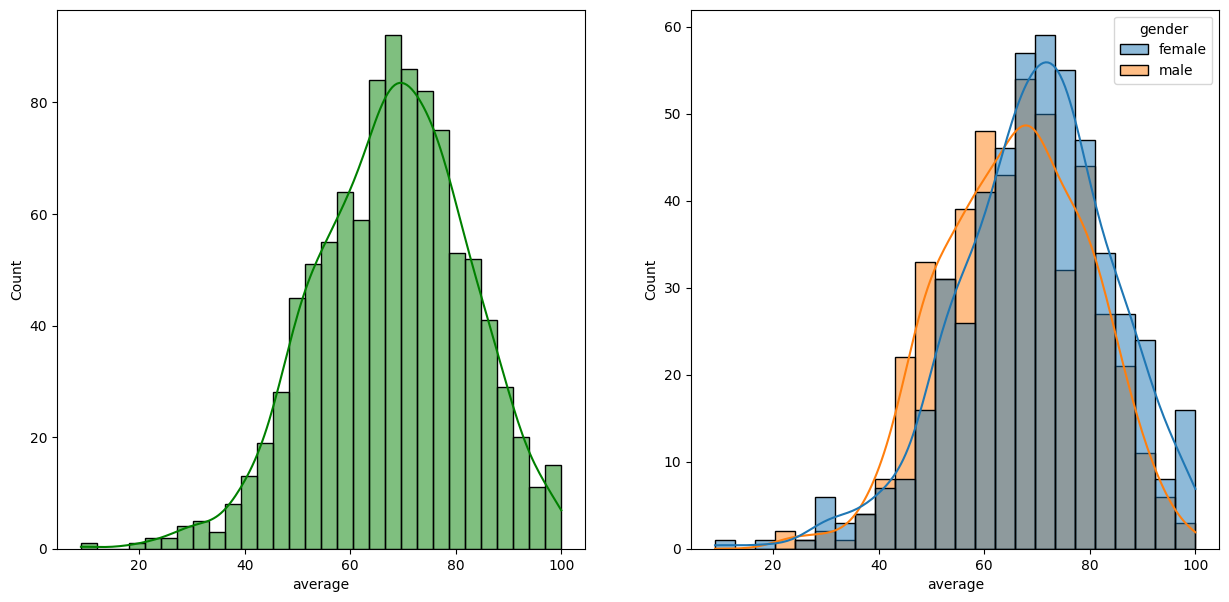

In [15]:
fig, axe= plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins= 30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')

<Axes: xlabel='total_score', ylabel='Count'>

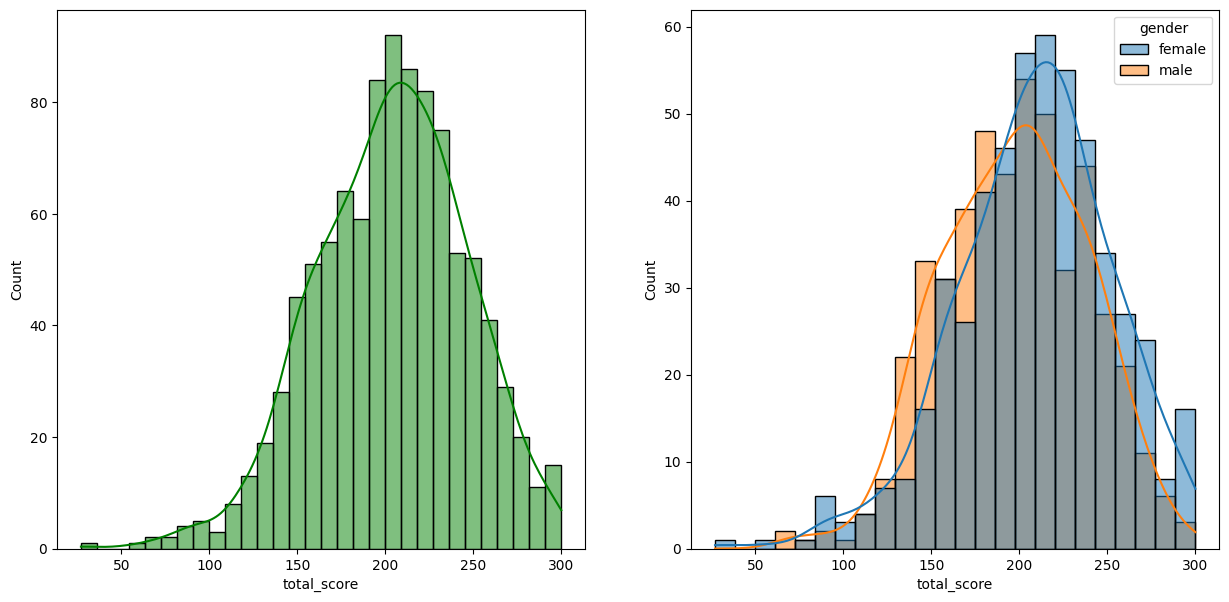

In [16]:
fig, axe= plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins= 30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total_score', kde=True, hue='gender')

**Insights**
- Female students tend to perform better than male students.

<Axes: xlabel='average', ylabel='Count'>

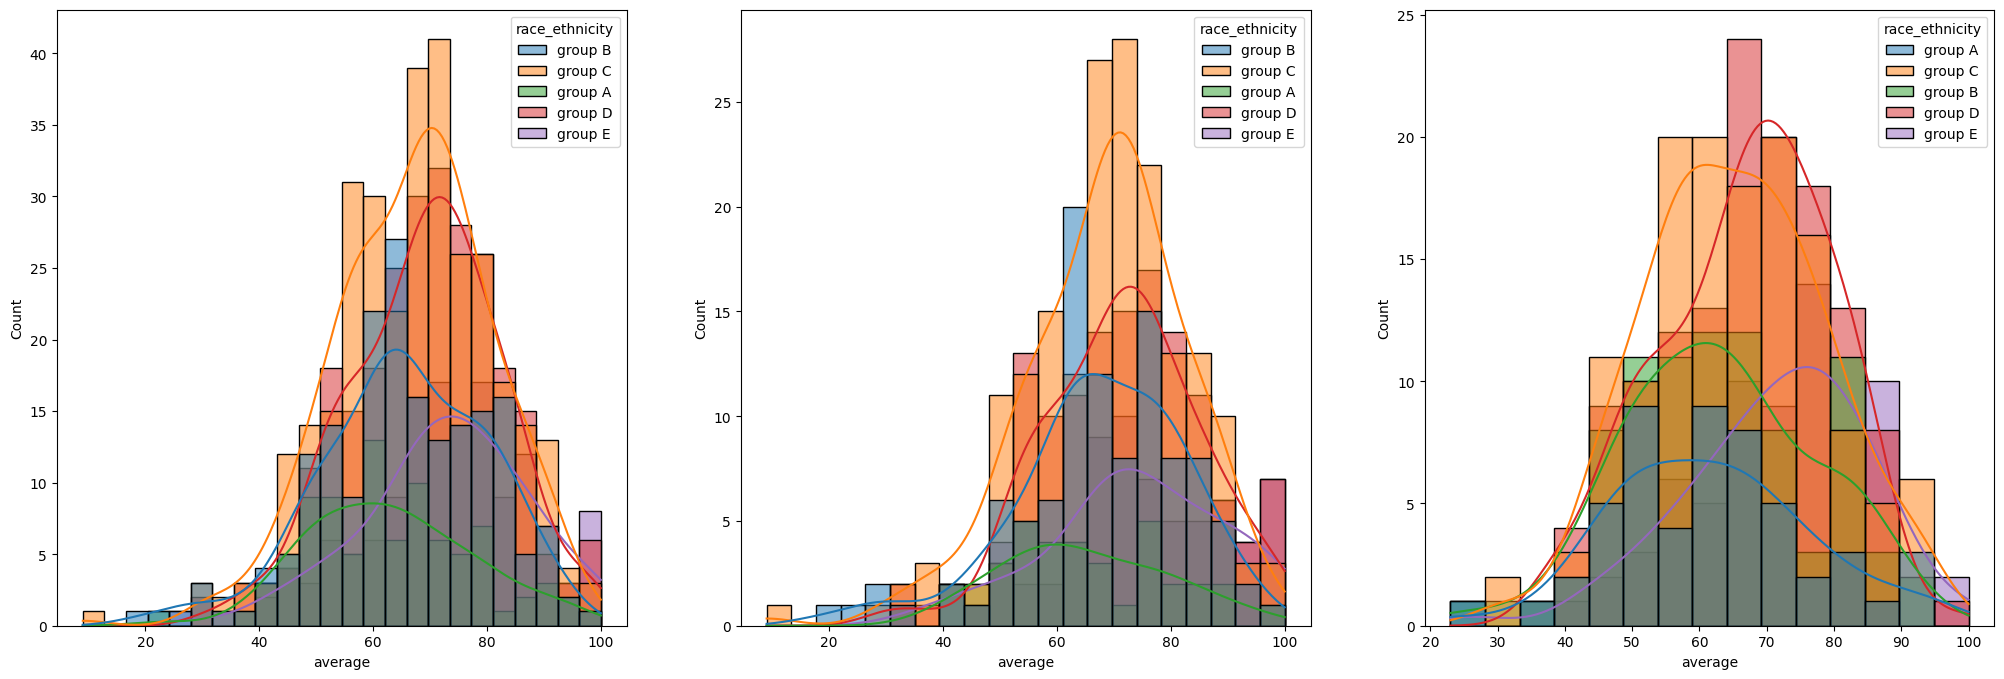

In [17]:
plt.subplots(1, 3, figsize=(25, 8))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='race_ethnicity')

**Insights**
- Students of group C and D consistently outperforms other groups regardless of gender.
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of their gender.

<Axes: xlabel='average', ylabel='Count'>

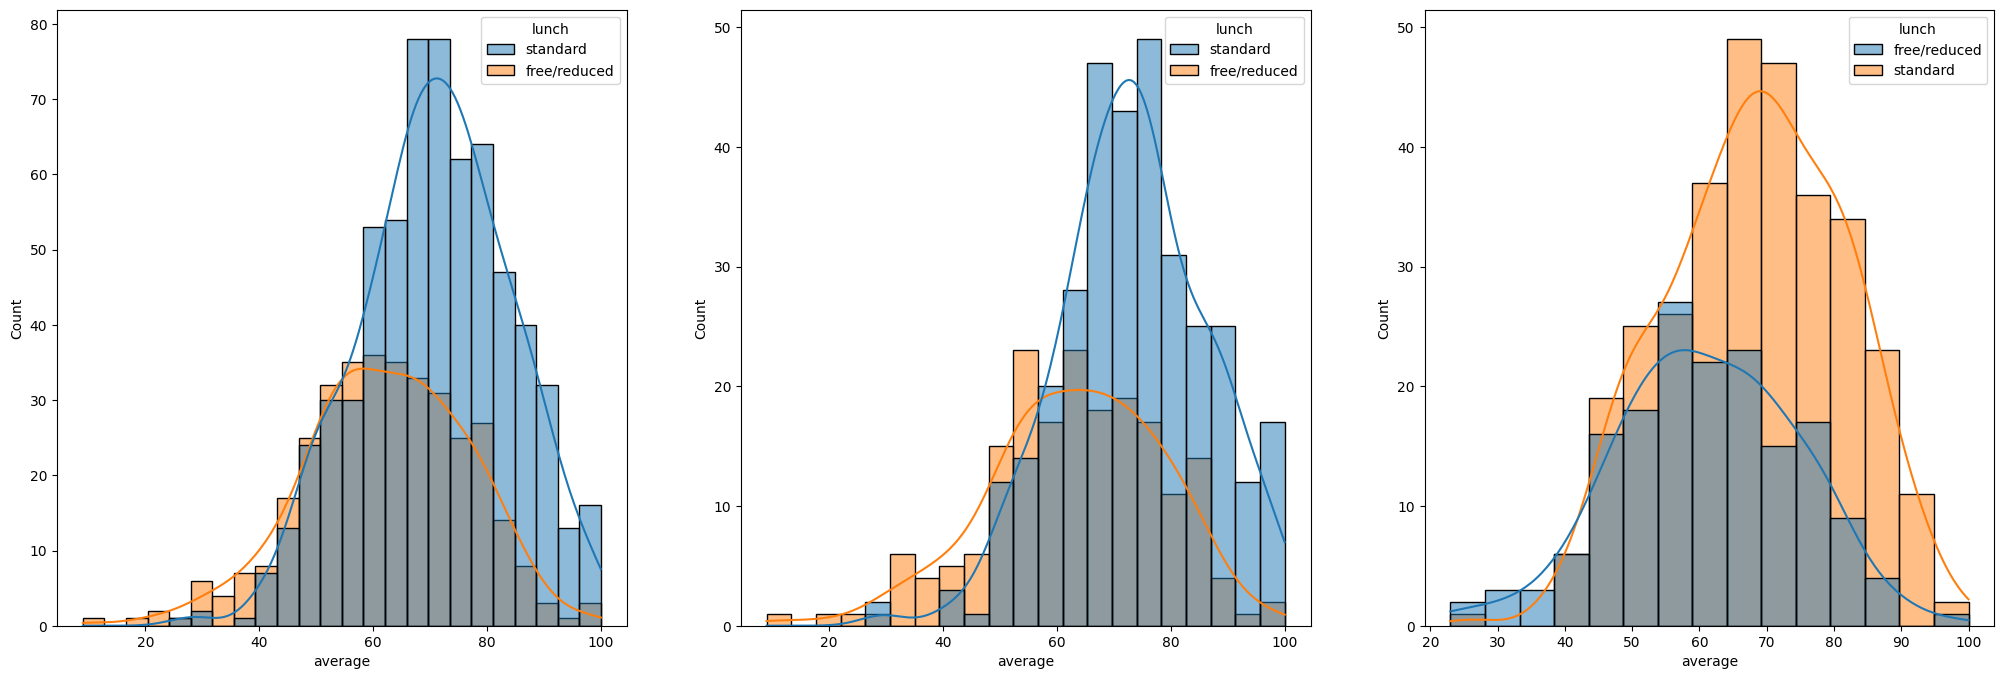

In [18]:
plt.subplots(1, 3, figsize=(25, 8))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch')

**Insights**
- Standard Lunch helps perform in exam better.
- Standard Lunch helps perform in exam regardless of gender.

<Axes: xlabel='average', ylabel='Count'>

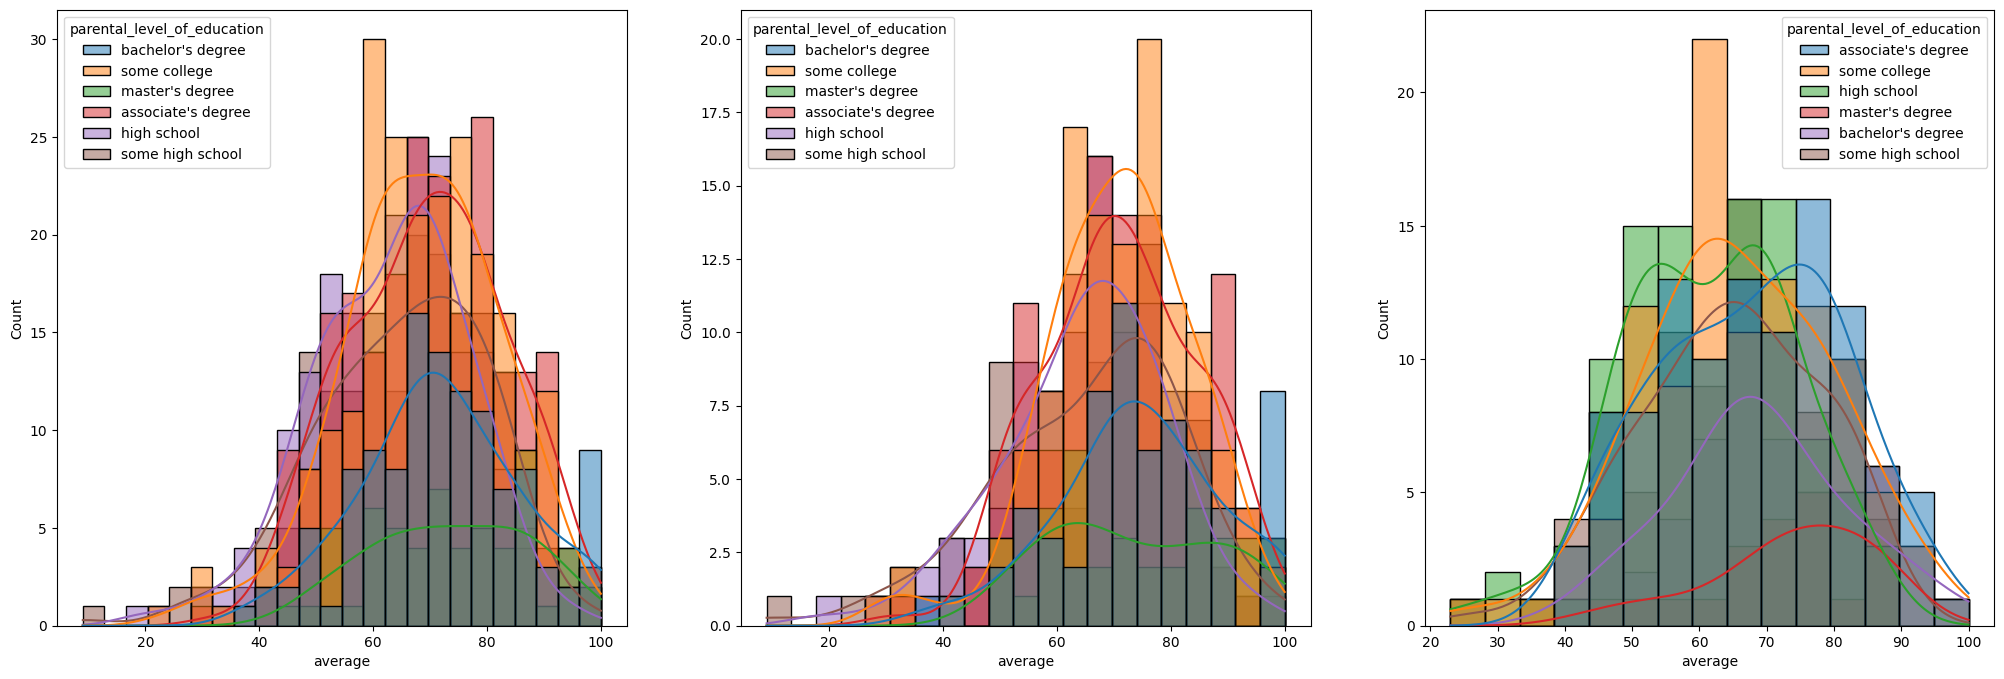

In [19]:
plt.subplots(1, 3, figsize=(25, 8))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='parental_level_of_education')

<Axes: xlabel='average', ylabel='Count'>

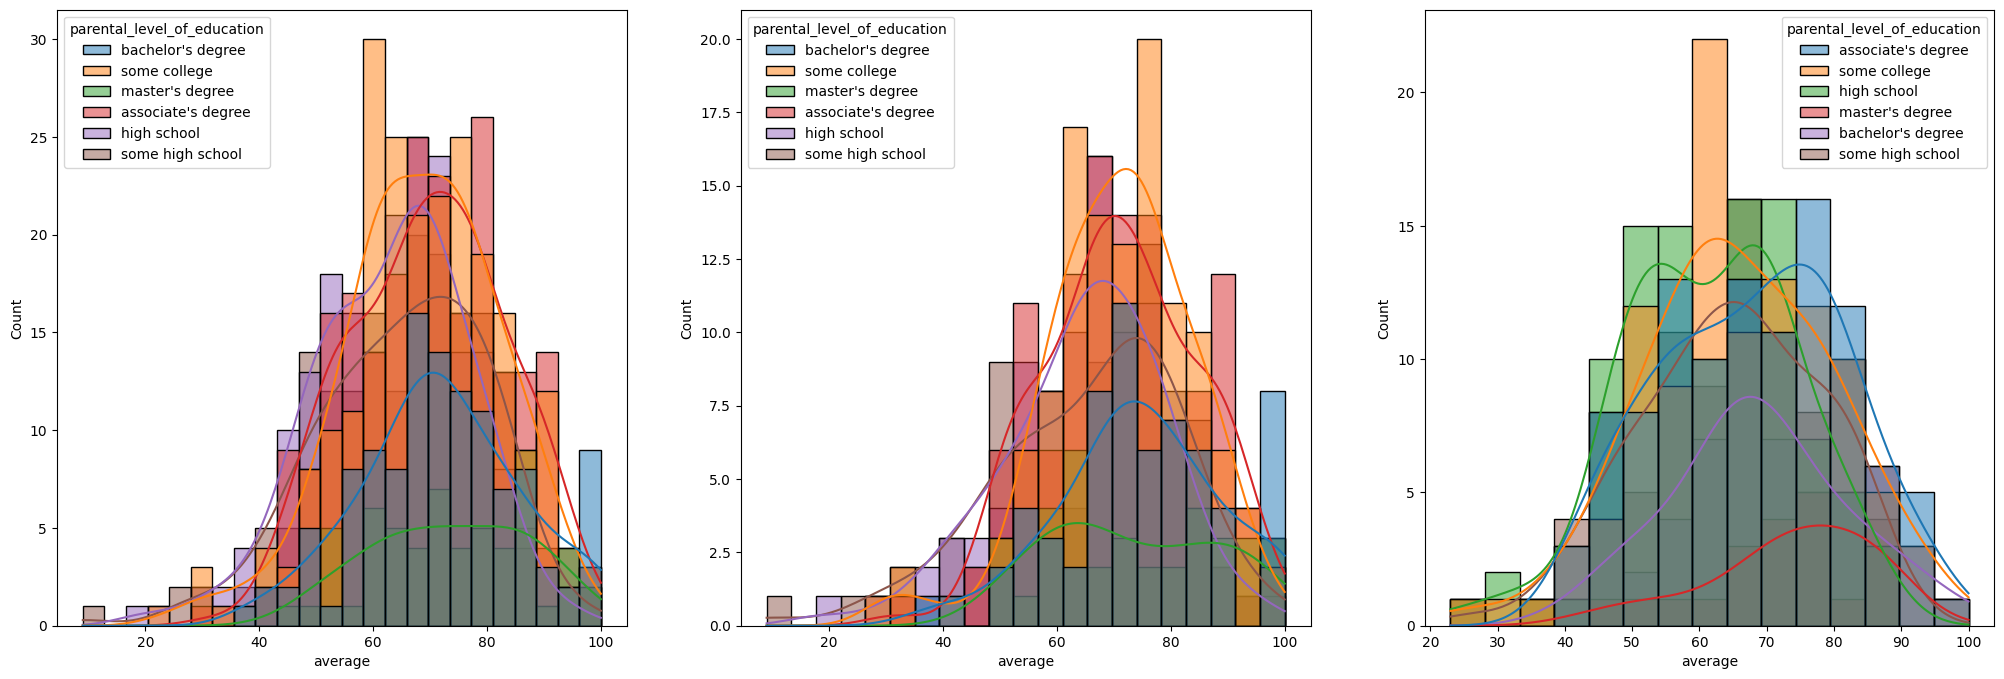

In [20]:
plt.subplots(1, 3, figsize=(25, 8))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='parental_level_of_education')

**Insights**
- In general parent's education don't help student perform well in exam.
- In 2nd plot we can see there is no effect of parent's education on female students.
- 3rd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam

#### Maximumum score of students in all three subjects

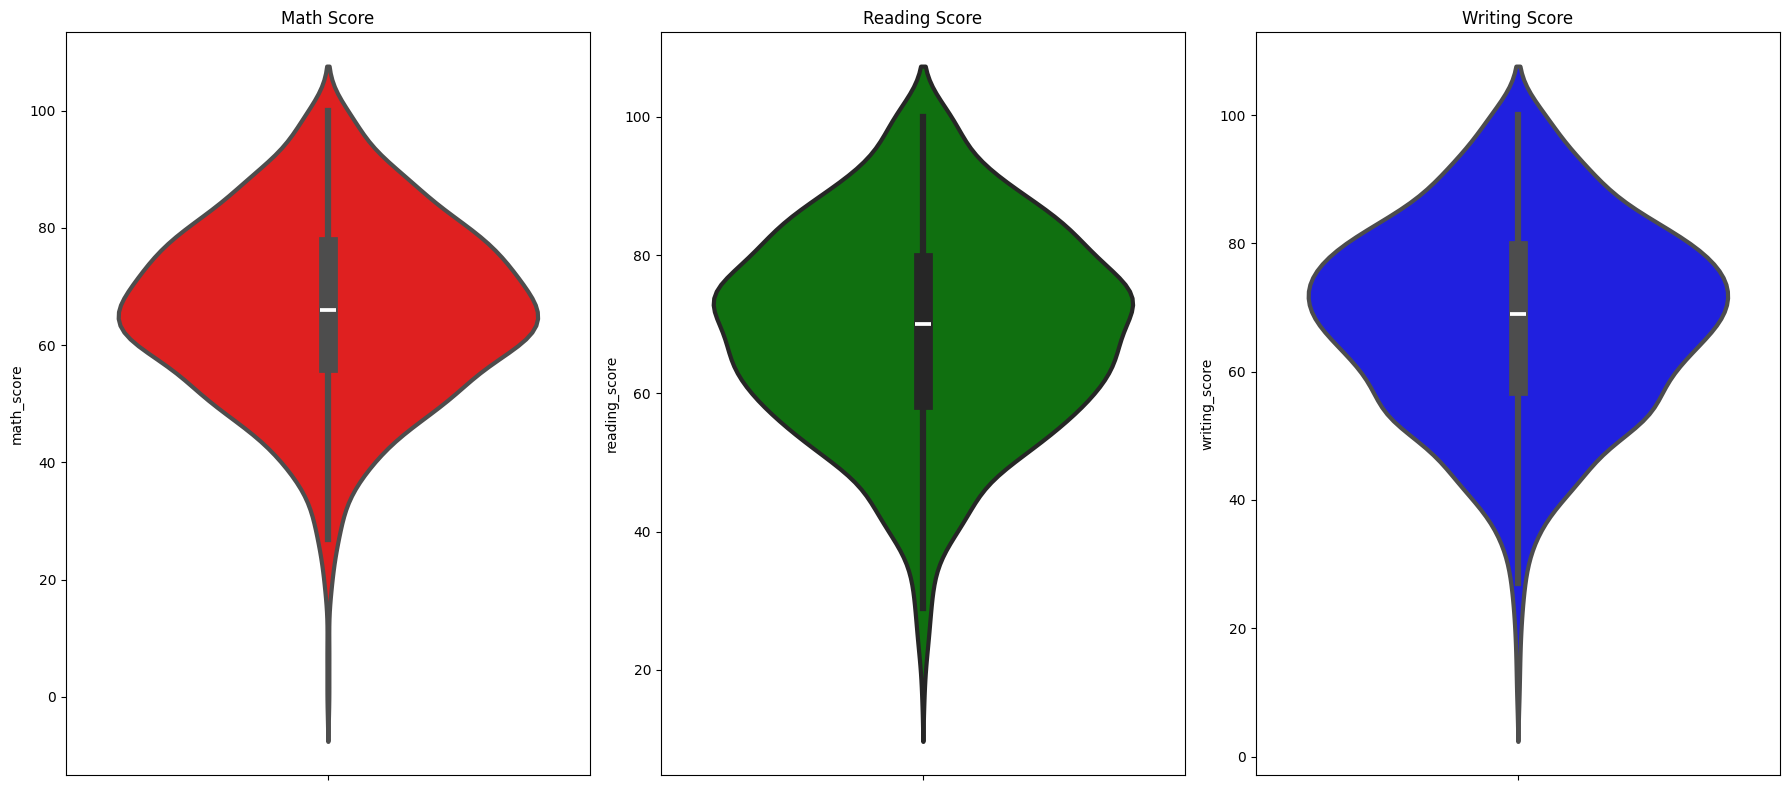

In [21]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 3, 1)
plt.title("Math Score")
sns.violinplot(data=df, y='math_score', linewidth= 3, color='red')
plt.subplot(1, 3, 2)
plt.title('Reading Score')
sns.violinplot(data=df, y='reading_score', linewidth= 3, color= 'green')
plt.subplot(1, 3, 3)
plt.title("Writing Score")
sns.violinplot(data= df, y='writing_score', linewidth=3, color= 'blue')

plt.tight_layout()
plt.show()

**Insights**
- Most students have scores that fall in the 60-80 range for all three subjects, but there are some outliers who perform extremely well or poorly.
- Math has the widest distribution of scores, with more students performing below average compared to reading and writing.

#### Multivariate analysis using pieplot

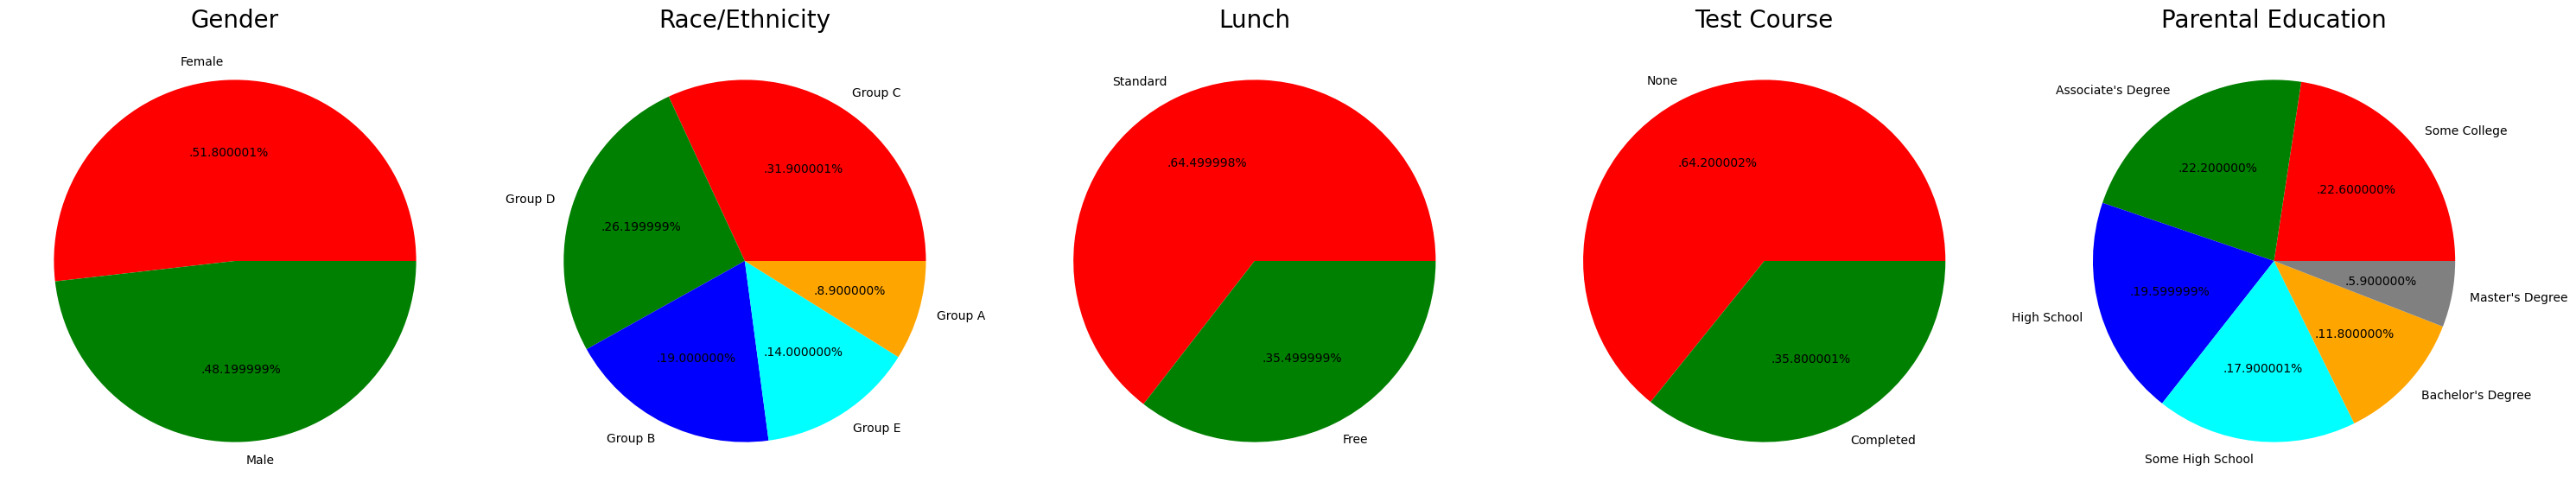

In [22]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

**Insights**
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"


#### Feature Wise Visualization

**1. GENDER COLUMN**
<br>UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

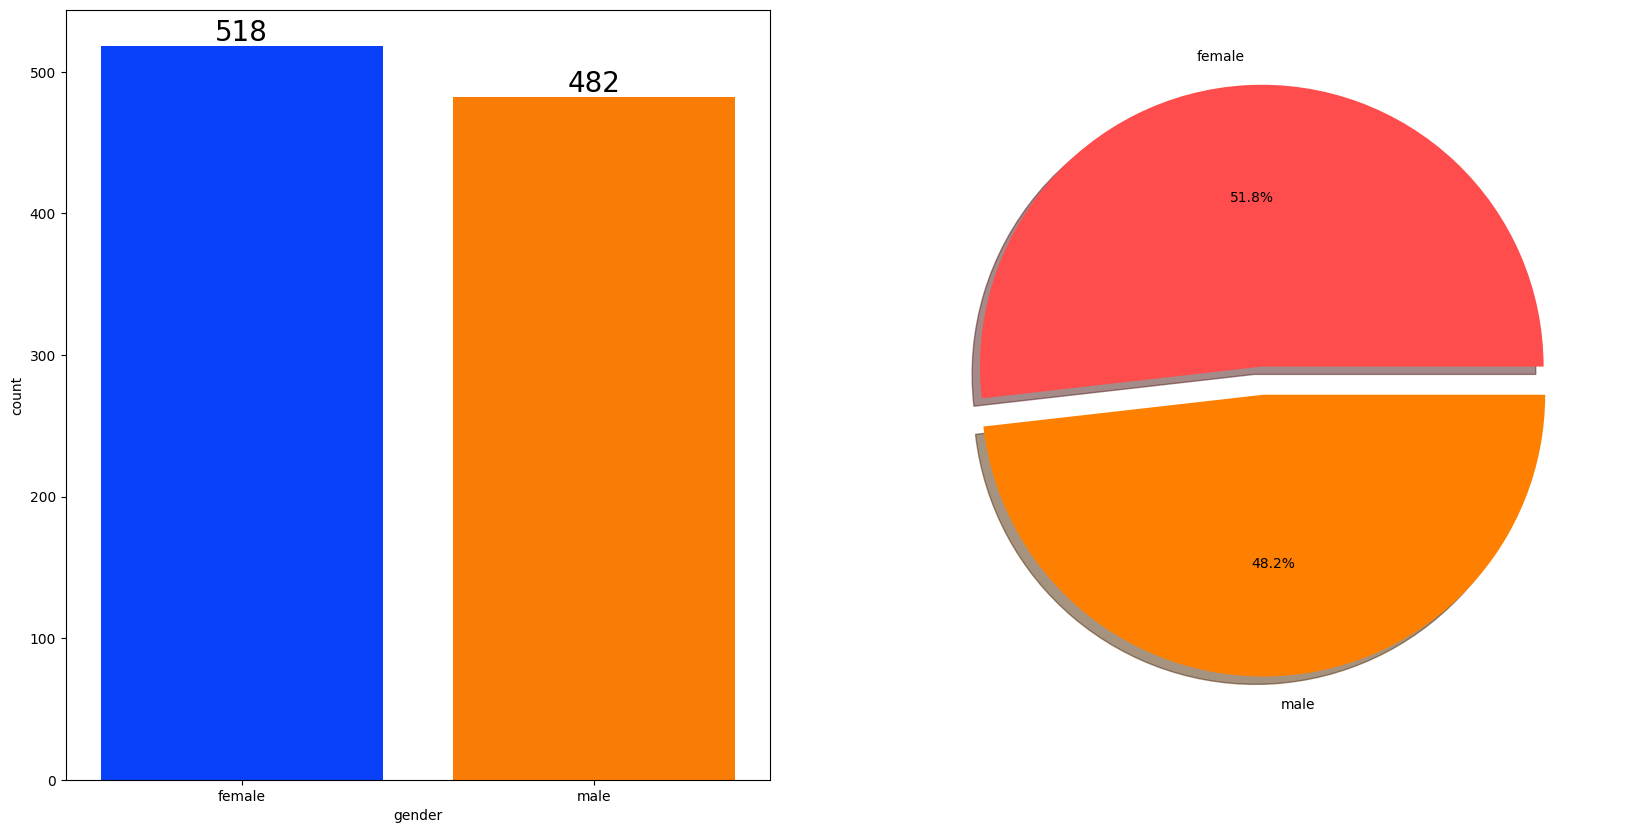

In [23]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Bar plot (ax[0])
sns.countplot(x='gender', data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Pie chart (ax[1])
ax[1].pie(df['gender'].value_counts(), labels=['female', 'male'], explode=[0.1, 0], 
          autopct='%1.1f%%', shadow=True, colors=['#ff4d4d', '#ff8000'])

plt.show()


**Insights**
- Gender has balanced data with 518 (52%) female students and 482 (48%) male students.

BIVARIATE ANALYSIS (Does gender has any impact on student's performance ?)

In [24]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


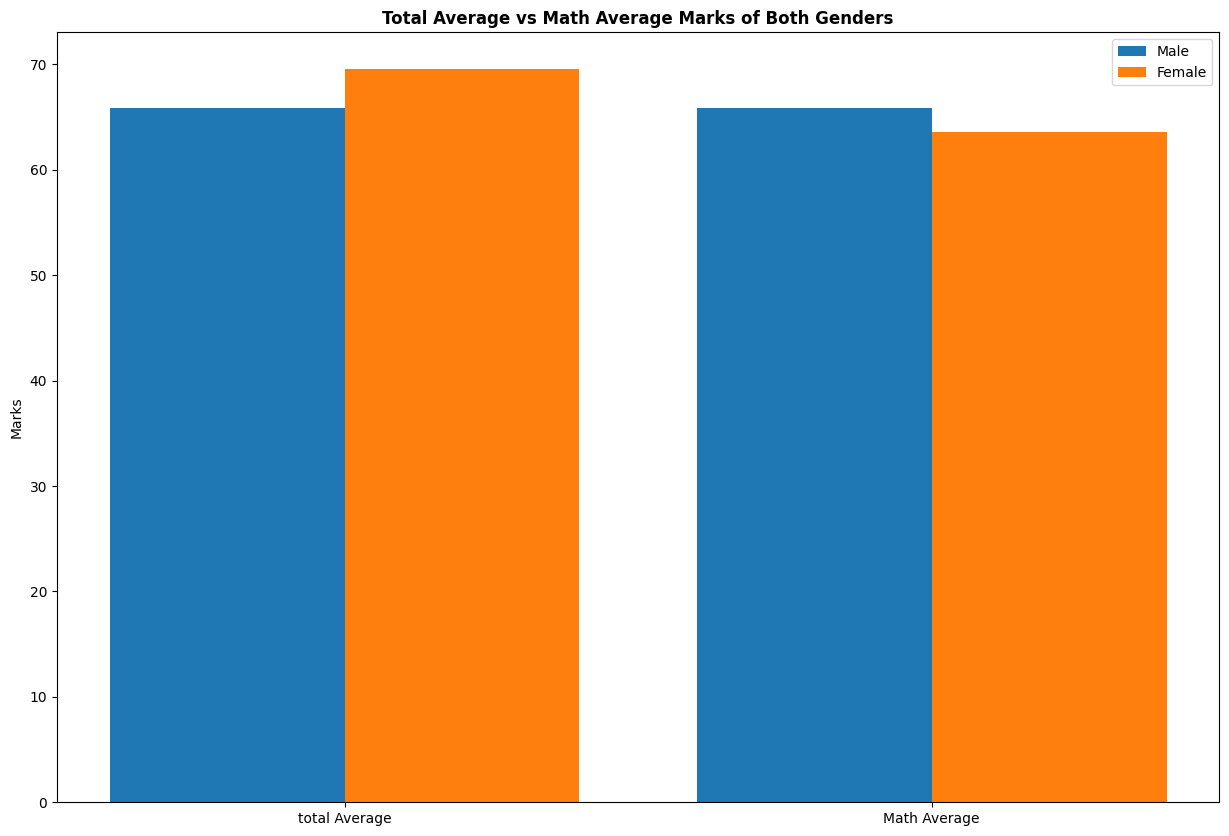

In [25]:
plt.figure(figsize=(15, 10))

# Define categories for the X-axis
X= ["total Average", "Math Average"]

# Extract female and male scores for average and math
female_scores= [gender_group['average']['female'], gender_group['math_score']['female']]
male_scores= [gender_group['average']['male'], gender_group['average']['male']]

# Set up X-axis positions
X_axis= np.arange(len(X))

# Create bar chart
plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

# Add X-ticks, labels, and title
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total Average vs Math Average Marks of Both Genders", fontweight='bold')
plt.legend()

# Show the plot
plt.show()

**Insights**
- On an average female students have a better overall score than male students.
- Whereas, male students have scored higher in math average.

**2. RACE/EHNICITY COLUMN**
<br> UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

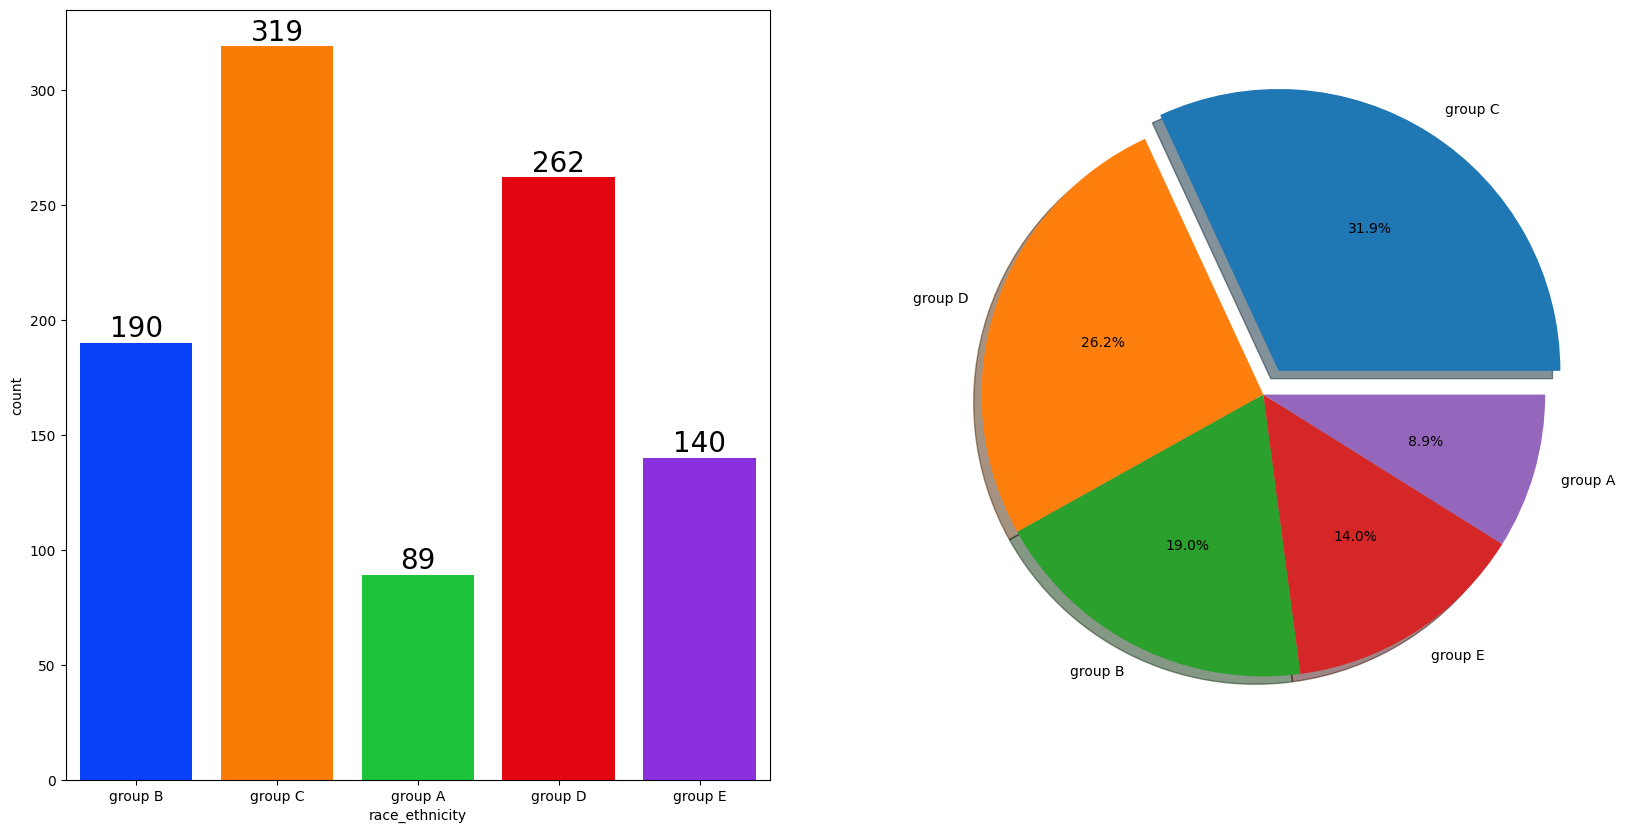

In [26]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Bar plot (ax[0])
sns.countplot(x=df['race_ethnicity'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Pie chart (ax[1])
ax[1].pie(df['race_ethnicity'].value_counts(), labels=df['race_ethnicity'].value_counts().index, explode=[0.1,0,0,0,0], 
          autopct='%1.1f%%', shadow=True)

plt.show()


**Insights**
- Most of the student are from group C /group D.
- Lowest number of students belong to groupA.

BIVARIATE ANALYSIS (Does Race/Ehnicity has any impact on student's performance ?)

In [27]:
race_ethnicity_group= df.groupby('race_ethnicity').mean(numeric_only=True)
race_ethnicity_group

,math_score,reading_score,writing_score,total_score,average
race_ethnicity,,,,,
group A,61.629213,64.674157,62.674157,188.977528,62.992509
group B,63.452632,67.352632,65.600000,196.405263,65.468421
group C,64.463950,69.103448,67.827586,201.394984,67.131661
group D,67.362595,70.030534,70.145038,207.538168,69.179389
group E,73.821429,73.028571,71.407143,218.257143,72.752381


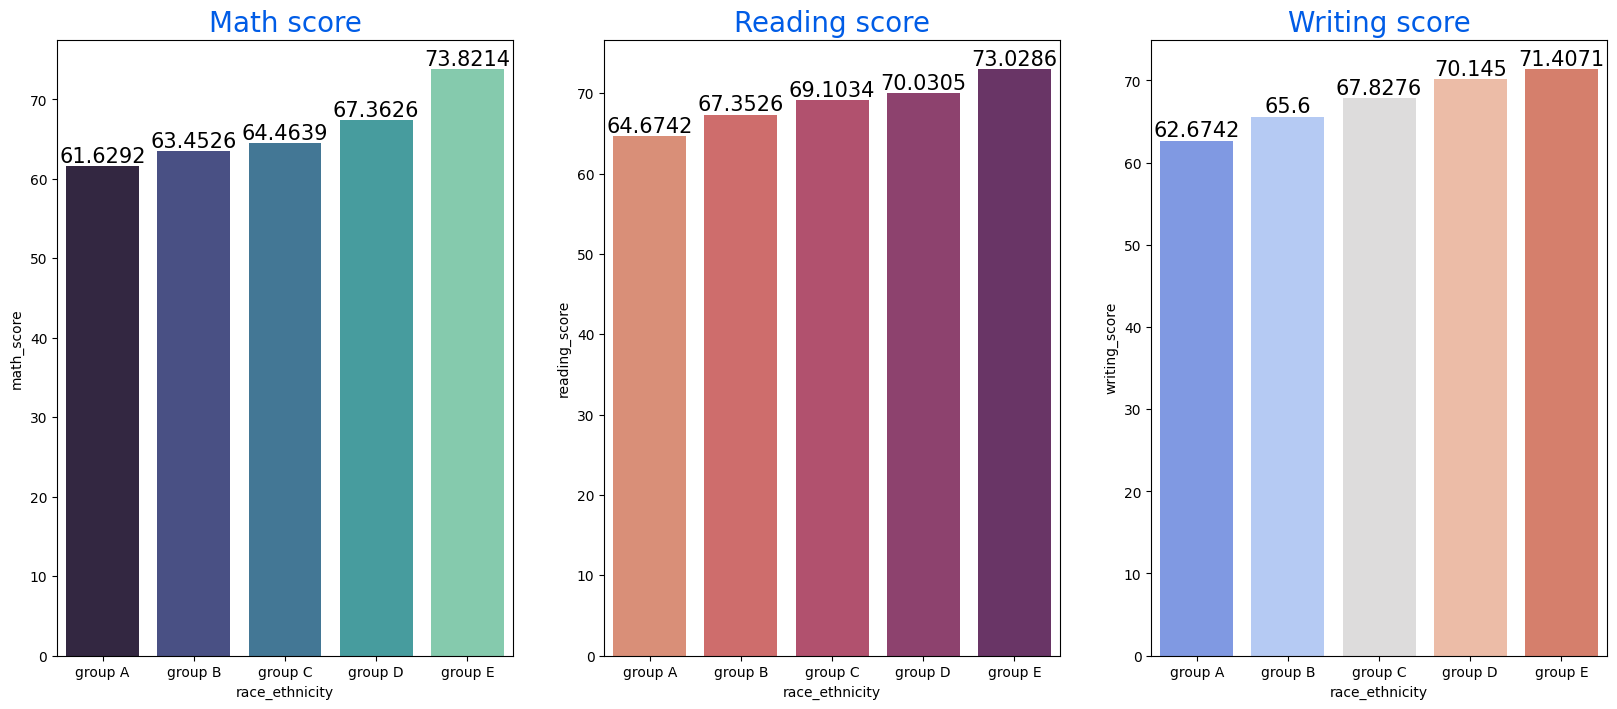

In [28]:
f,ax=plt.subplots(1,3,figsize=(20,8))

sns.barplot(x=race_ethnicity_group.index, y=race_ethnicity_group['math_score'], palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=race_ethnicity_group.index, y=race_ethnicity_group['reading_score'], palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=race_ethnicity_group.index, y=race_ethnicity_group['writing_score'], palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

**Insights**
- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower Socioeconomic status have a lower avg in all course subjects

**3. PARENTAL LEVEL OF EDUCATION COLUMN**
<br> UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

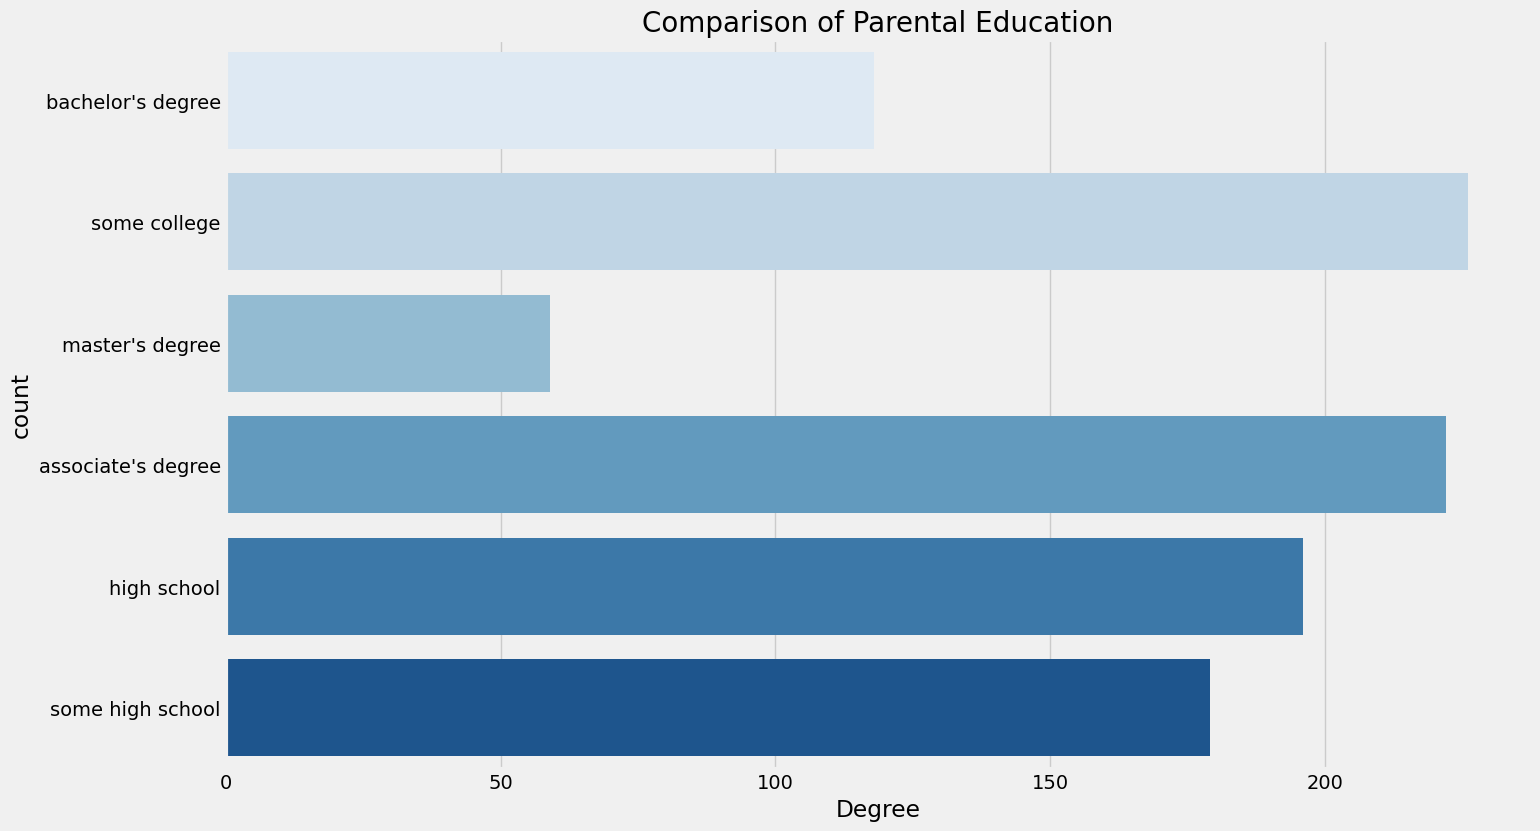

In [29]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

**Insights**
- Most number of parents are from some college.
- Least number of parents have a master's degree.

BIVARIATE ANALYSIS (Does parental education has any impact on student's performance ?)

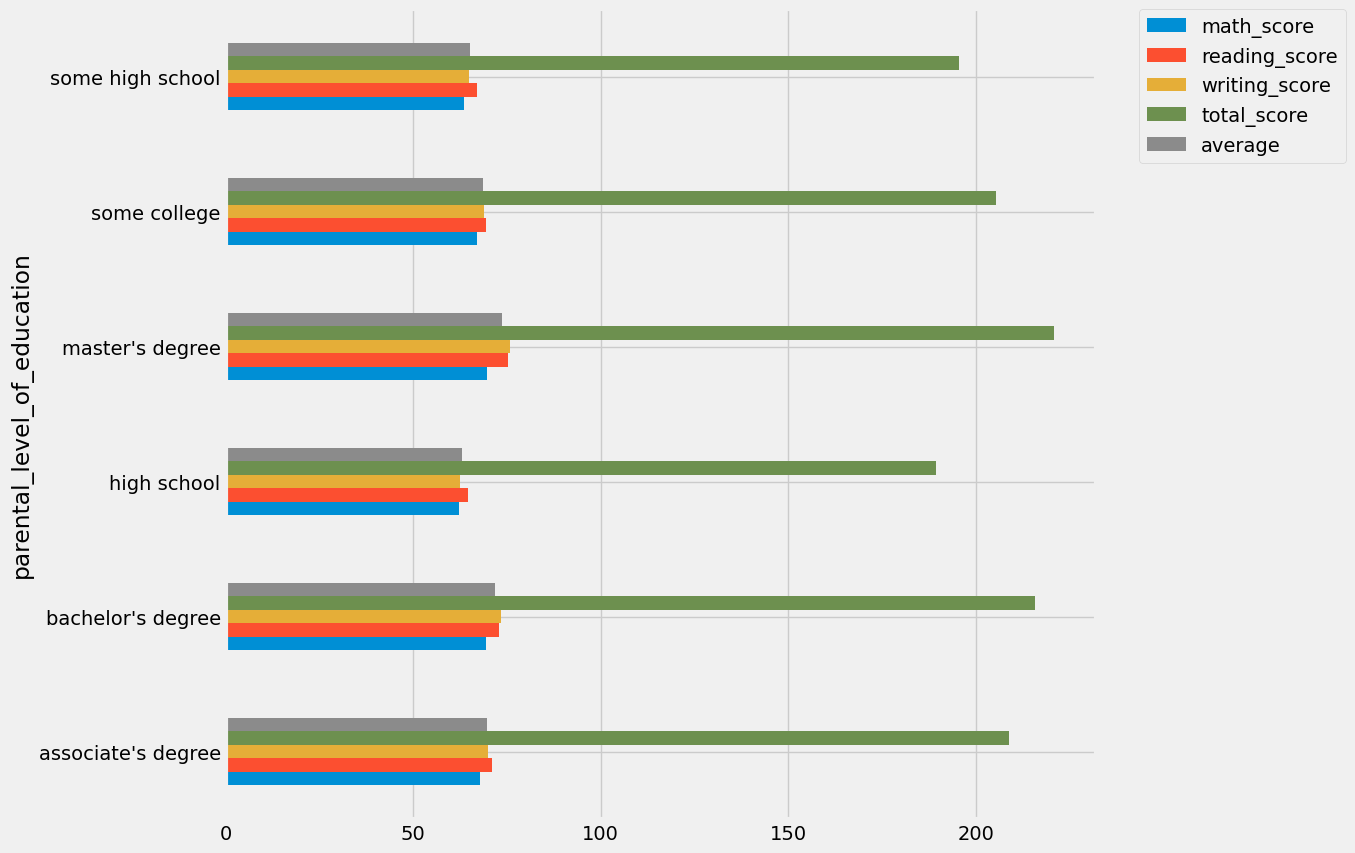

In [30]:
df.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

**Insights**
- The score of student whose parents possess master and bachelor level education are higher than others.

**4. LUNCH COLUMN**
- UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

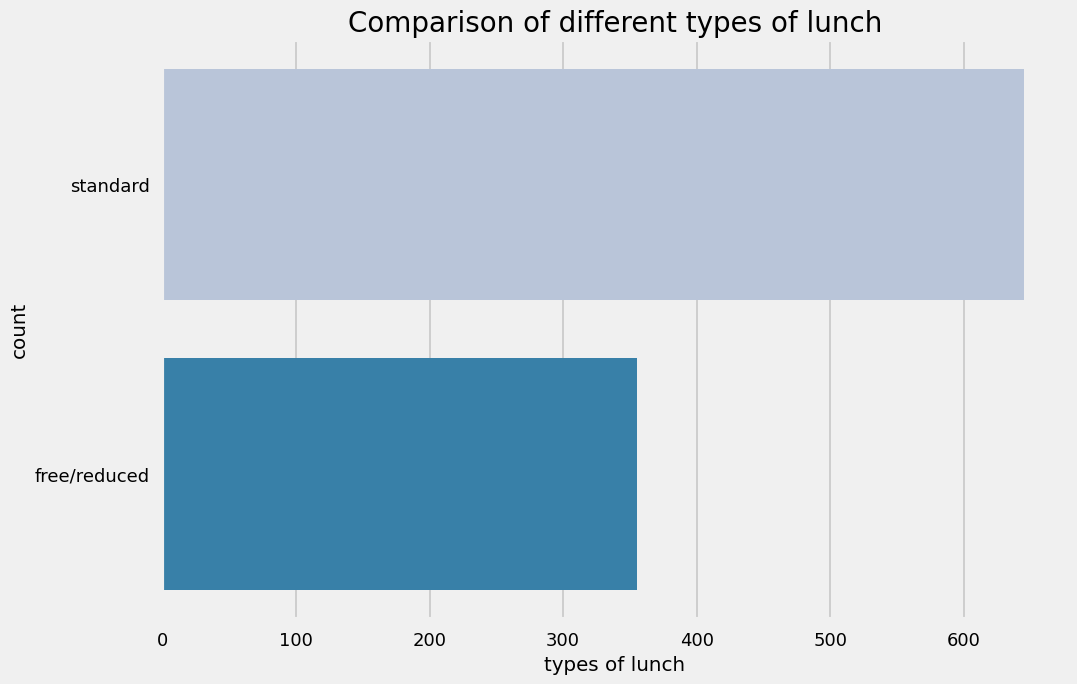

In [31]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-v0_8-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

**Insights**
- Most students have Standard lunch.

BIVARIATE ANALYSIS (Does lunch type intake has any impact on student's performance ?)

<Axes: xlabel='lunch', ylabel='writing_score'>

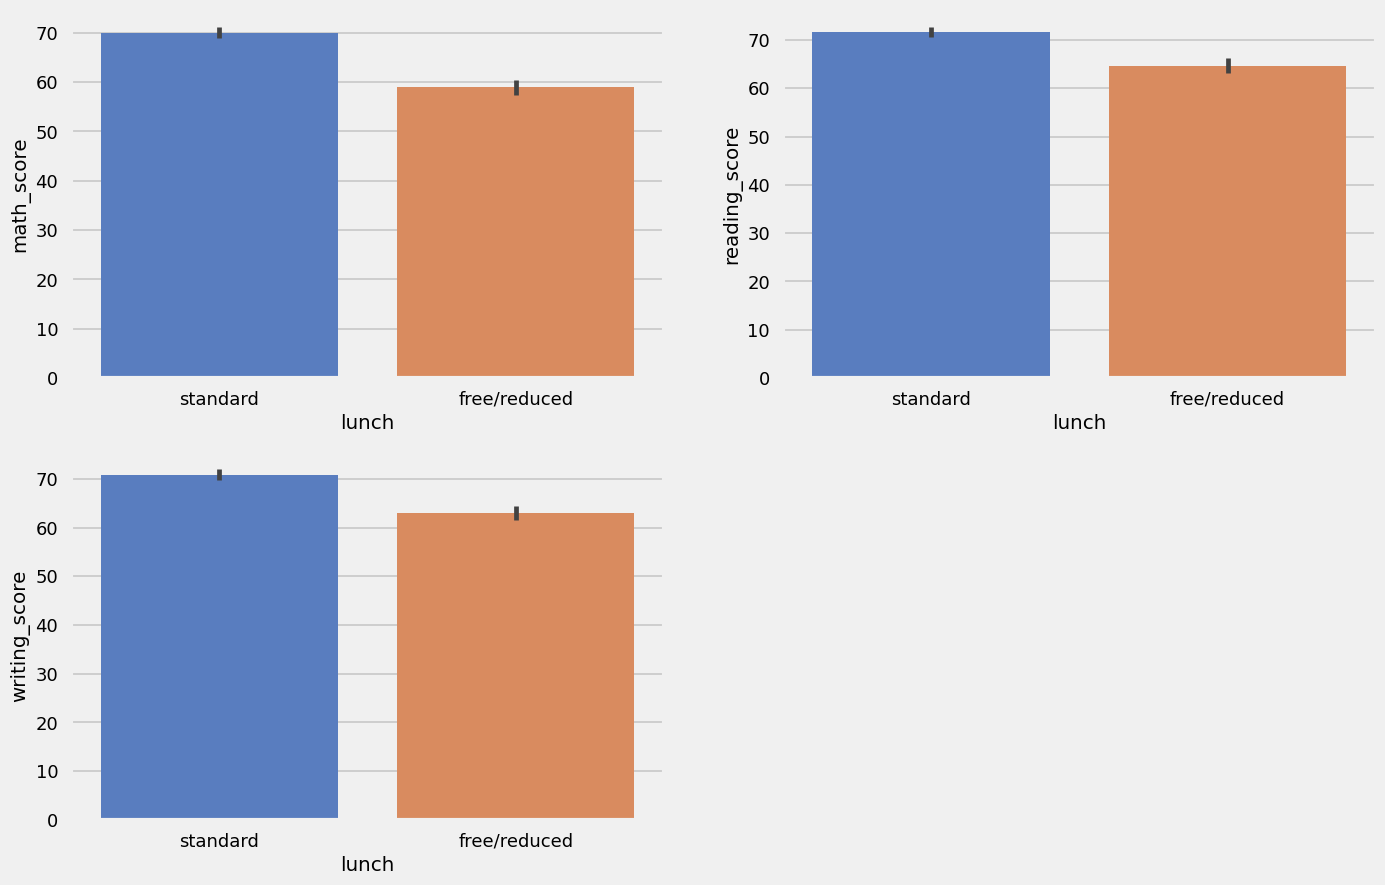

In [32]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], palette= 'muted')
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], palette= 'muted')
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], palette= 'muted')

**Insights**
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

**5. TEST PREPARATION COURSE COLUMN**
<br> BIVARIATE ANALYSIS (Does Test prepration course has any impact on student's performance ? )

In [33]:
test_preparation_course_group= df.groupby('test_preparation_course').mean(numeric_only=True)
test_preparation_course_group

,math_score,reading_score,writing_score,total_score,average
test_preparation_course,,,,,
completed,69.695531,73.893855,74.418994,218.008380,72.669460
none,64.077882,66.534268,64.504673,195.116822,65.038941


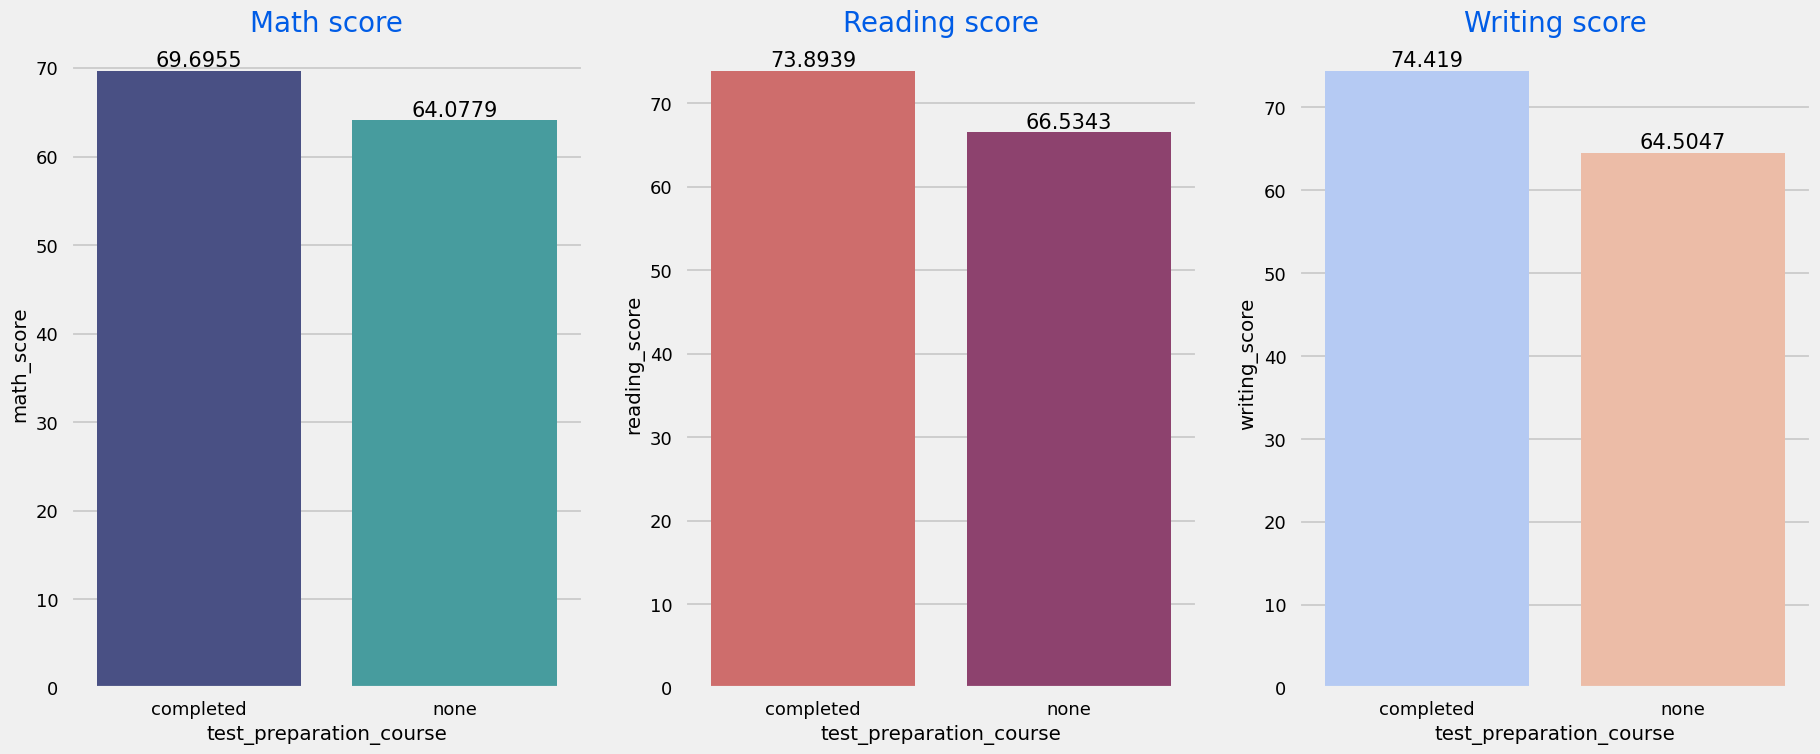

In [34]:
f,ax=plt.subplots(1,3,figsize=(20,8))

sns.barplot(x=test_preparation_course_group.index, y=test_preparation_course_group['math_score'], palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=test_preparation_course_group.index, y=test_preparation_course_group['reading_score'], palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=test_preparation_course_group.index, y=test_preparation_course_group['writing_score'], palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

**Insights**
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

**6. CHECKING OUTLIERS**

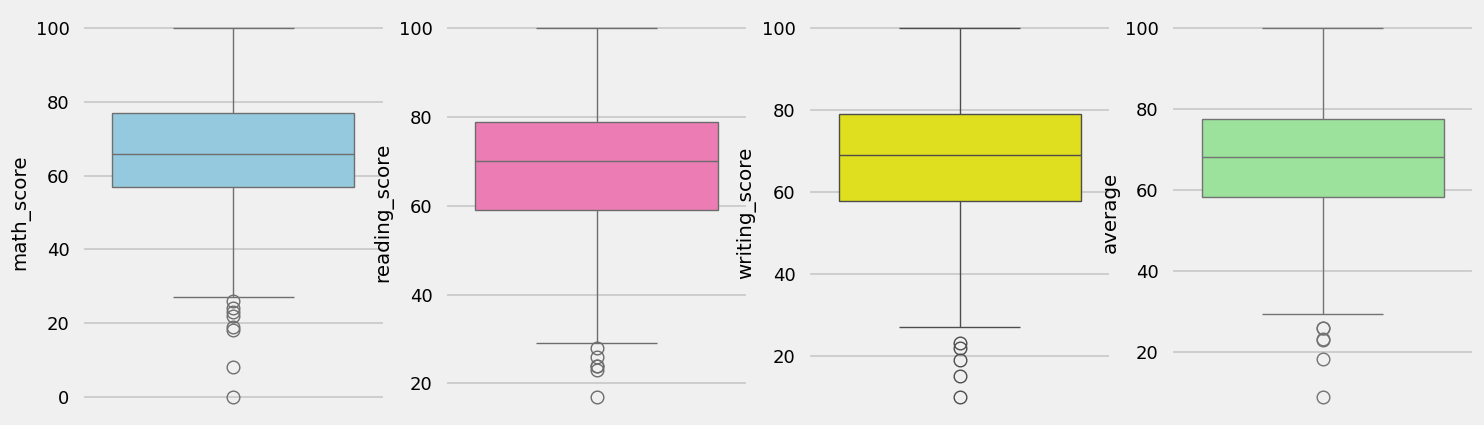

In [35]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

**Insights**
- Outliers: In all subjects, there are a few students who performed significantly lower, possibly requiring extra attention or support.
- Performance Consistency: The scores for reading and writing are more tightly packed, suggesting students performed more consistently in these subjects compared to math, which has more variance.
- Overall Distribution: Students' performance is skewed slightly towards higher marks, as the majority of the data lies above 60 for most subjects.

**7. MUTIVARIATE ANALYSIS USING PAIRPLOT**

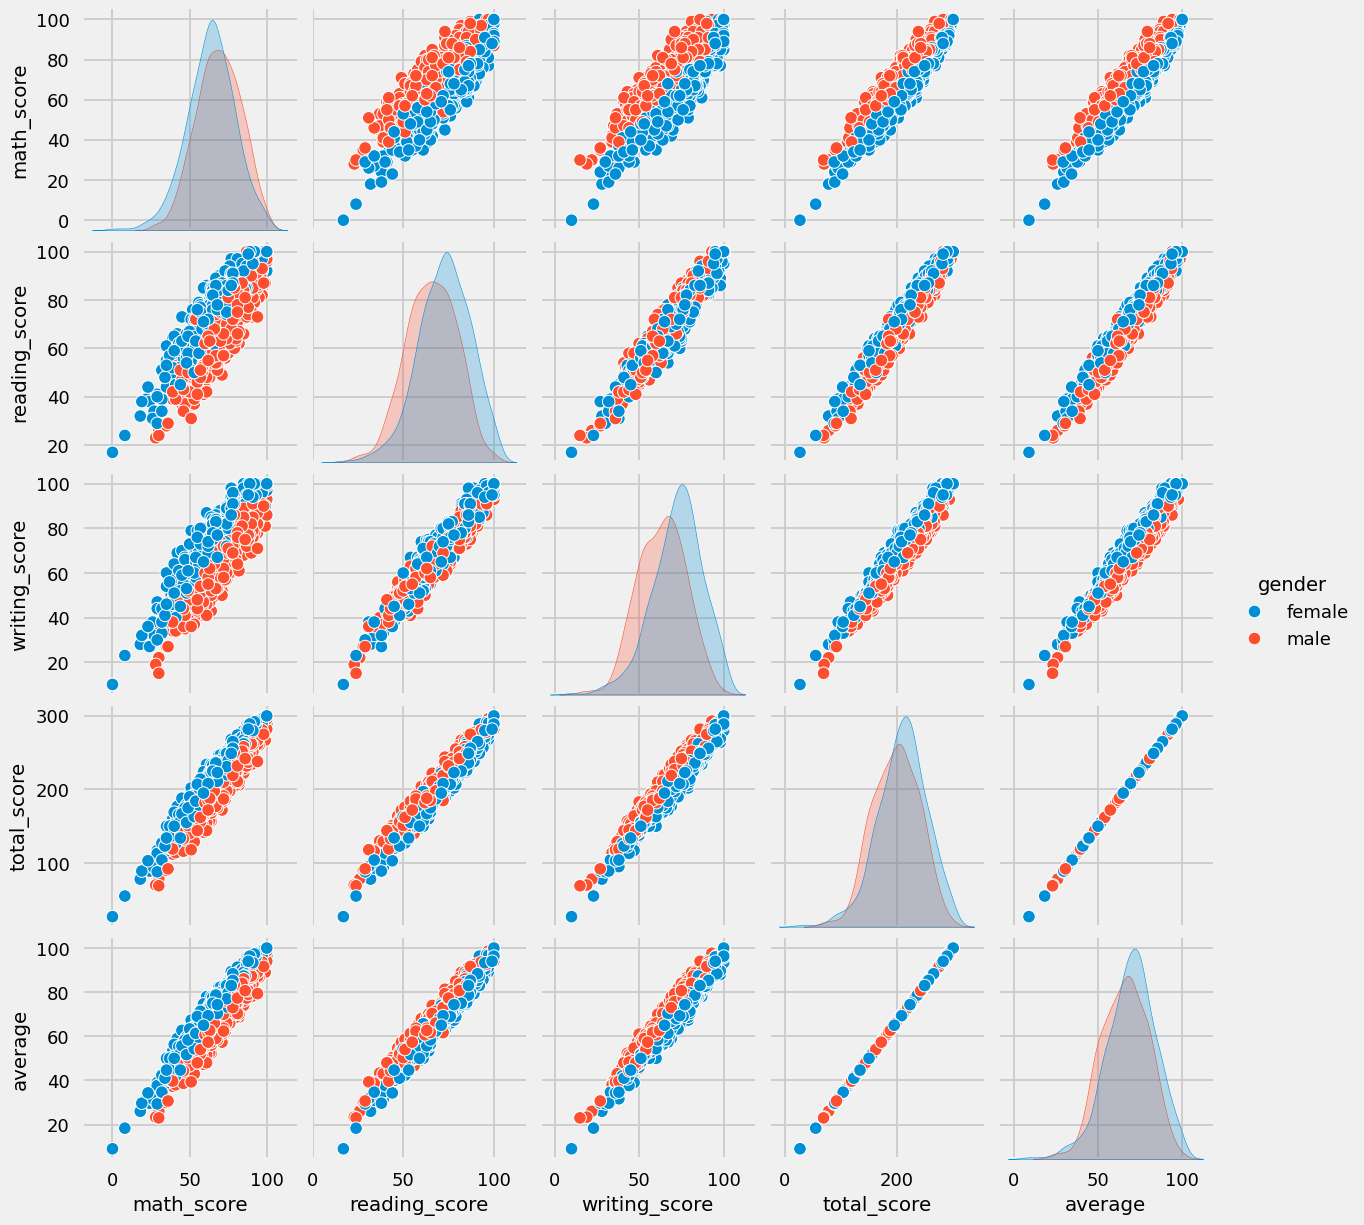

In [36]:
sns.pairplot(df, hue='gender')
plt.show()

**Insights**
- Math scores show some difference between genders, with male students performing slightly better at the high end.
- Reading and writing scores show less variation between genders, suggesting more consistent performance.
- There is a strong overall correlation between performance in different subjects, implying that students who do well in one subject are likely to perform well in others.

**8. Conclusions**
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.